<a href="https://colab.research.google.com/github/AYODEJI-OWA/OwadoyeProject/blob/main/clothes_sizePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [32]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/DataRohit/Clothes-Size-Prediction/master/final_test.csv')
raw_data.head()


,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [33]:
raw_data.describe(include='all')

,weight,age,height,size
count,119734.000000,119477.000000,119404.000000,119734
unique,NaN,NaN,NaN,7
top,NaN,NaN,NaN,M
freq,NaN,NaN,NaN,29712
mean,61.756811,34.027311,165.805794,NaN
std,9.944863,8.149447,6.737651,NaN
min,22.000000,0.000000,137.160000,NaN
25%,55.000000,29.000000,160.020000,NaN
50%,61.000000,32.000000,165.100000,NaN
75%,67.000000,37.000000,170.180000,NaN


In [6]:
data = raw_data.drop(['size'],axis=1)
data.describe(include='all')

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [7]:
data.isnull().sum()

weight      0
age       257
height    330
dtype: int64

In [34]:
raw_data=raw_data.dropna(axis=0)

In [8]:
data_no_mv = data.dropna(axis=0)

In [9]:
data_no_mv.describe(include='all')

,weight,age,height
count,119153.000000,119153.000000,119153.000000
mean,61.756095,34.032714,165.807068
std,9.942877,8.148302,6.737797
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


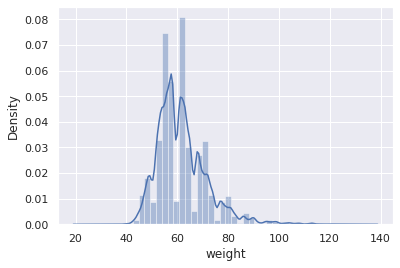

In [10]:
sns.distplot(data_no_mv['weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


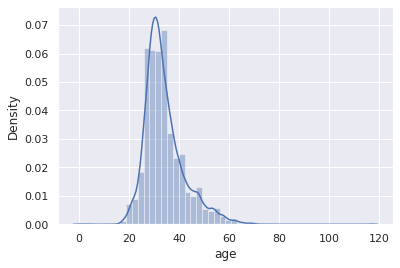

In [11]:
sns.distplot(data_no_mv['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


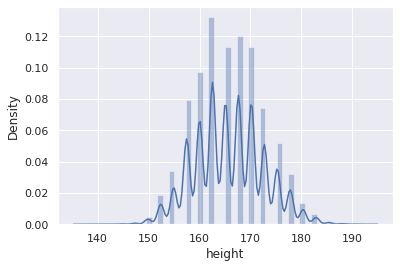

In [12]:
sns.distplot(data_no_mv['height'])

In [26]:
data_no_mv

,weight,age,height
0,62,28.0,172.72
1,59,36.0,167.64
2,61,34.0,165.10
3,65,27.0,175.26
4,62,45.0,172.72
...,...,...,...
119729,63,42.0,175.26
119730,45,29.0,154.94
119731,61,31.0,172.72
119732,74,31.0,167.64


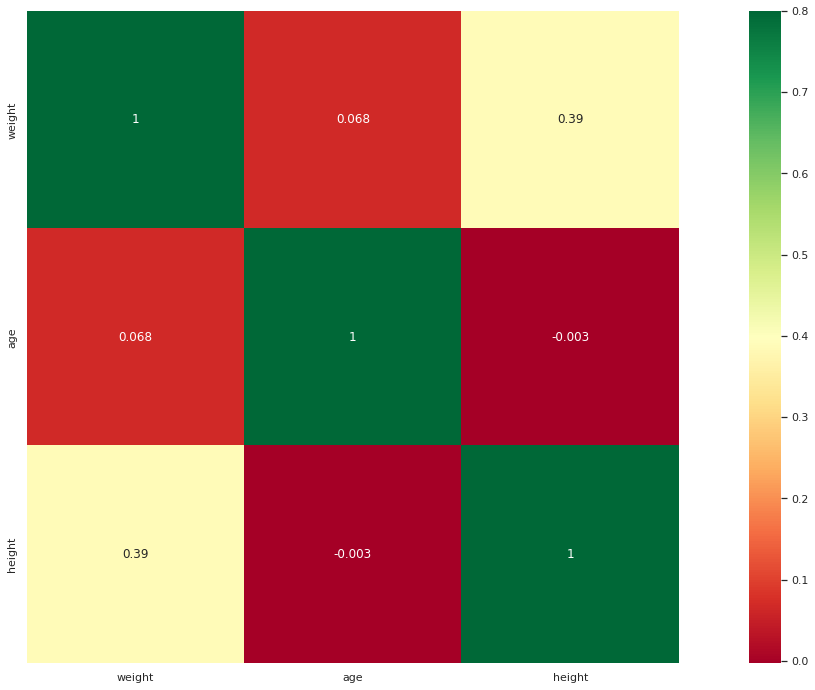

In [27]:
matrix = data_no_mv.corr() 
f, ax = plt.subplots(figsize=(25, 12)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="RdYlGn",annot = True);

In [35]:
raw_data['size'] = raw_data['size'].map({'XL': 0, 'L': 1, 'M': 2, 'S': 3, 'XXS': 4, 'XXXL': 5, 'XXL': 6})
raw_data.head()

,weight,age,height,size
0,62,28.0,172.72,0
1,59,36.0,167.64,1
2,61,34.0,165.10,2
3,65,27.0,175.26,1
4,62,45.0,172.72,2


In [36]:
targets = raw_data['size']
inputs = raw_data.drop(['size'],axis=1)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [38]:
inputs_scaled = scaler.transform(inputs)

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [40]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [24]:
inputs

,weight,age,height
0,62,28.0,172.72
1,59,36.0,167.64
2,61,34.0,165.10
3,65,27.0,175.26
4,62,45.0,172.72
...,...,...,...
119729,63,42.0,175.26
119730,45,29.0,154.94
119731,61,31.0,172.72
119732,74,31.0,167.64


In [41]:
y_hat = reg.predict(x_train)

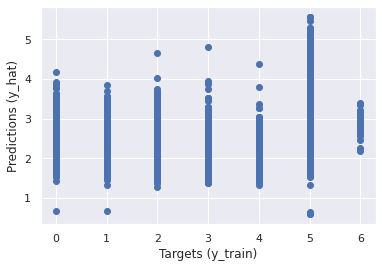

In [55]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

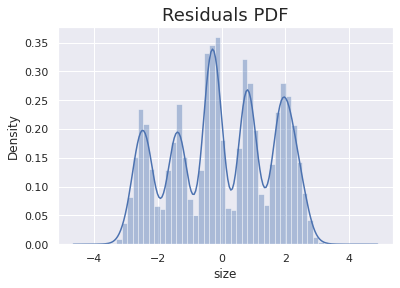

In [44]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [45]:
reg.score(x_train,y_train)

0.05939420721198363

In [46]:
reg.coef_

array([ 0.41727375,  0.00830236, -0.27999339])

In [47]:
reg.intercept_

2.423902271990543

In [49]:
x_train

array([[-0.07604422, -0.37219128,  0.27203845],
       [-1.28294346, -0.49491675, -0.85889977],
       [-0.78006878,  2.20504356, -0.85889977],
       ...,
       [-0.07604422, -0.98581862, -1.61285858],
       [-0.78006878, -1.47672049, -0.10494096],
       [-0.78006878, -1.23126956, -0.85889977]])

In [50]:
y_hat

array([2.31291198, 2.12494092, 2.35719338, ..., 2.83557614, 2.11552255,
       2.32866386])

In [53]:
y_hat_test = reg.predict(x_test)

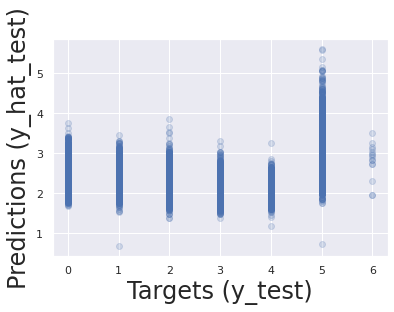

In [61]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=24)
plt.ylabel('Predictions (y_hat_test)',size=24)
plt.show()

In [57]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10.241069
1,6.763574
2,8.089999
3,9.951115
4,9.054960


In [58]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10.241069,NaN
1,6.763574,NaN
2,8.089999,NaN
3,9.951115,NaN
4,9.054960,NaN
...,...,...
23826,10.999672,NaN
23827,13.533140,NaN
23828,12.478604,NaN
23829,12.352775,NaN


In [59]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    3
1    2
2    2
3    0
4    2
Name: size, dtype: int64

In [60]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10.241069,20.085537
1,6.763574,7.389056
2,8.089999,7.389056
3,9.951115,1.000000
4,9.054960,7.389056
...,...,...
23826,10.999672,2.718282
23827,13.533140,20.085537
23828,12.478604,2.718282
23829,12.352775,1.000000


In [63]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [64]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10.241069,20.085537,9.844468,49.012720
1,6.763574,7.389056,0.625482,8.464980
2,8.089999,7.389056,-0.700943,9.486229
3,9.951115,1.000000,-8.951115,895.111457
4,9.054960,7.389056,-1.665904,22.545563
...,...,...,...,...
23826,10.999672,2.718282,-8.281390,304.655319
23827,13.533140,20.085537,6.552397,32.622465
23828,12.478604,2.718282,-9.760322,359.062172
23829,12.352775,1.000000,-11.352775,1135.277477


In [65]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,23831.000000,23831.000000,23831.000000,23831.000000
mean,12.457230,36.726543,24.269313,278.631250
std,8.346631,54.104536,50.877223,438.275907
min,1.962365,1.000000,-125.217251,0.033245
25%,8.729203,2.718282,-7.354685,52.091788
50%,10.585141,7.389056,-0.793926,84.298345
75%,13.557381,54.598150,43.093471,270.763001
max,273.630410,403.428793,396.378830,4141.075640


In [66]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
21926,7.39,7.39,-0.00,0.03
17702,7.39,7.39,-0.00,0.03
11622,7.39,7.39,-0.00,0.03
7104,7.39,7.39,-0.00,0.03
11370,7.39,7.39,-0.00,0.03
...,...,...,...,...
19027,30.45,1.00,-29.45,2944.78
9963,31.15,1.00,-30.15,3015.26
19732,33.73,1.00,-32.73,3272.57
14824,37.60,1.00,-36.60,3660.42
